Reading dataframe

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib
import matplotlib.pyplot as plt
from IPython.display import Image

"""# **Read Dataset Customer Churn **"""

originalData = pd.read_csv("CustomerChurn.csv")
display(originalData.head(5))

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,No,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,No,Yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,No,No,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,Yes,No,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,Yes,No,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


# Check missing data

In [2]:
missingPercentage = originalData.isnull().sum()/originalData.shape[0]*100
print("CustomerChurn missing:")
display(missingPercentage)

CustomerChurn missing:


State                     0.0
Account length            0.0
Area code                 0.0
International plan        0.0
Voice mail plan           0.0
Number vmail messages     0.0
Total day minutes         0.0
Total day calls           0.0
Total day charge          0.0
Total eve minutes         0.0
Total eve calls           0.0
Total eve charge          0.0
Total night minutes       0.0
Total night calls         0.0
Total night charge        0.0
Total intl minutes        0.0
Total intl calls          0.0
Total intl charge         0.0
Customer service calls    0.0
Churn                     0.0
dtype: float64

There is no missing data
# Get dataset dimensions

In [3]:
observations, attributes = originalData.shape
print("Customer churn observations and attributes:", observations, attributes)

Customer churn observations and attributes: 3333 20


# Calculate mean and std

In [4]:
describeData = originalData.describe().loc[['mean', 'std']]
print("Describe CustomerChurn: ")
display(describeData)

Describe CustomerChurn: 


,Account length,Area code,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls
mean,101.064806,437.182418,8.099010,179.775098,100.435644,30.562307,200.980348,100.114311,17.083540,200.872037,100.107711,9.039325,10.237294,4.479448,2.764581,1.562856
std,39.822106,42.371290,13.688365,54.467389,20.069084,9.259435,50.713844,19.922625,4.310668,50.573847,19.568609,2.275873,2.791840,2.461214,0.753773,1.315491


# Encode string data

In [5]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
dataEncoded = originalData.copy();
dataEncoded["State"] = le.fit_transform(originalData["State"])
dataEncoded["International plan"] = le.fit_transform(originalData["International plan"])
dataEncoded["Voice mail plan"] = le.fit_transform(originalData["Voice mail plan"])
dataEncoded["Area code"] = le.fit_transform(originalData["Area code"])
dataEncoded.head(10)

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,16,128,1,0,1,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,35,107,1,0,1,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,31,137,1,0,0,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,35,84,0,1,0,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,36,75,1,1,0,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False
5,1,118,2,1,0,0,223.4,98,37.98,220.6,101,18.75,203.9,118,9.18,6.3,6,1.70,0,False
6,19,121,2,0,1,24,218.2,88,37.09,348.5,108,29.62,212.6,118,9.57,7.5,7,2.03,3,False
7,24,147,1,1,0,0,157.0,79,26.69,103.1,94,8.76,211.8,96,9.53,7.1,6,1.92,0,False
8,18,117,0,0,0,0,184.5,97,31.37,351.6,80,29.89,215.8,90,9.71,8.7,4,2.35,1,False
9,49,141,1,1,1,37,258.6,84,43.96,222.0,111,18.87,326.4,97,14.69,11.2,5,3.02,0,False


# Define function for splitting data

In [6]:
def splitDataFrameToTrainAndTest(dataframe, trainDataRate, targetAtt): 
#     df = dataframe.copy()
    trainData = dataframe.sample(frac=trainDataRate, random_state=1)
    testData = dataframe.loc[~dataframe.index.isin(trainData.index)]
    x_train = trainData.drop(targetAtt, 1)
    y_train = trainData[targetAtt]
    x_test = testData.drop(targetAtt, 1)
    y_test = testData[targetAtt]
    return x_train, y_train, x_test, y_test

# Split data for training and testing

In [7]:
x_train, y_train, x_test, y_test = splitDataFrameToTrainAndTest(dataframe=dataEncoded, trainDataRate=0.6, targetAtt='Churn')

# Define Naive Bayes trainer

In [8]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
def NaiveBayesLearning(DataTrain, TargetTrain):
    NBModel = GaussianNB()
    NBModel.fit(DataTrain, TargetTrain.ravel())
    return NBModel

def NaiveBayesTesting(NBModel, DataTest, TargetTest):
    PredictTest = NBModel.predict(DataTest)
    Accuracy = accuracy_score(TargetTest, PredictTest)
    return Accuracy, PredictTest

# Running train and test

In [9]:
import datetime
a = datetime.datetime.now()
model = NaiveBayesLearning(x_train, y_train)
b = datetime.datetime.now()
NBTime = b-a
accuracy, predictTest = NaiveBayesTesting(model, x_test, y_test)
print("Accuracy:", accuracy)
print("Predict:", predictTest)

Accuracy: 0.8664666166541636
Predict: [False  True  True ...  True  True False]


# Define Decision Tree trainer

In [10]:
from sklearn import tree
def DecisionTreeLearning(DataTrain, TargetTrain):
    if (type(TargetTrain) == bool):
        clf = tree.DecisionTreeClassifier()
    else:
        clf = tree.DecisionTreeRegressor()
    clf.fit(DataTrain, TargetTrain)
    return clf

def DecisionTreeTesting(DTModel, DataTest, TargetTest):
    predictTest = DTModel.predict(DataTest)
    accuracy = accuracy_score(TargetTest, predictTest)
    return accuracy, predictTest

# Train and test the model

In [11]:
a = datetime.datetime.now()
dt = DecisionTreeLearning(x_train, y_train)
b = datetime.datetime.now()
DTTime = b-a
acc, predict = DecisionTreeTesting(dt, x_test, y_test)
print("Accuracy:", acc)
print("Predicted:", predict)

Accuracy: 0.90847711927982
Predicted: [0. 0. 1. ... 0. 1. 0.]


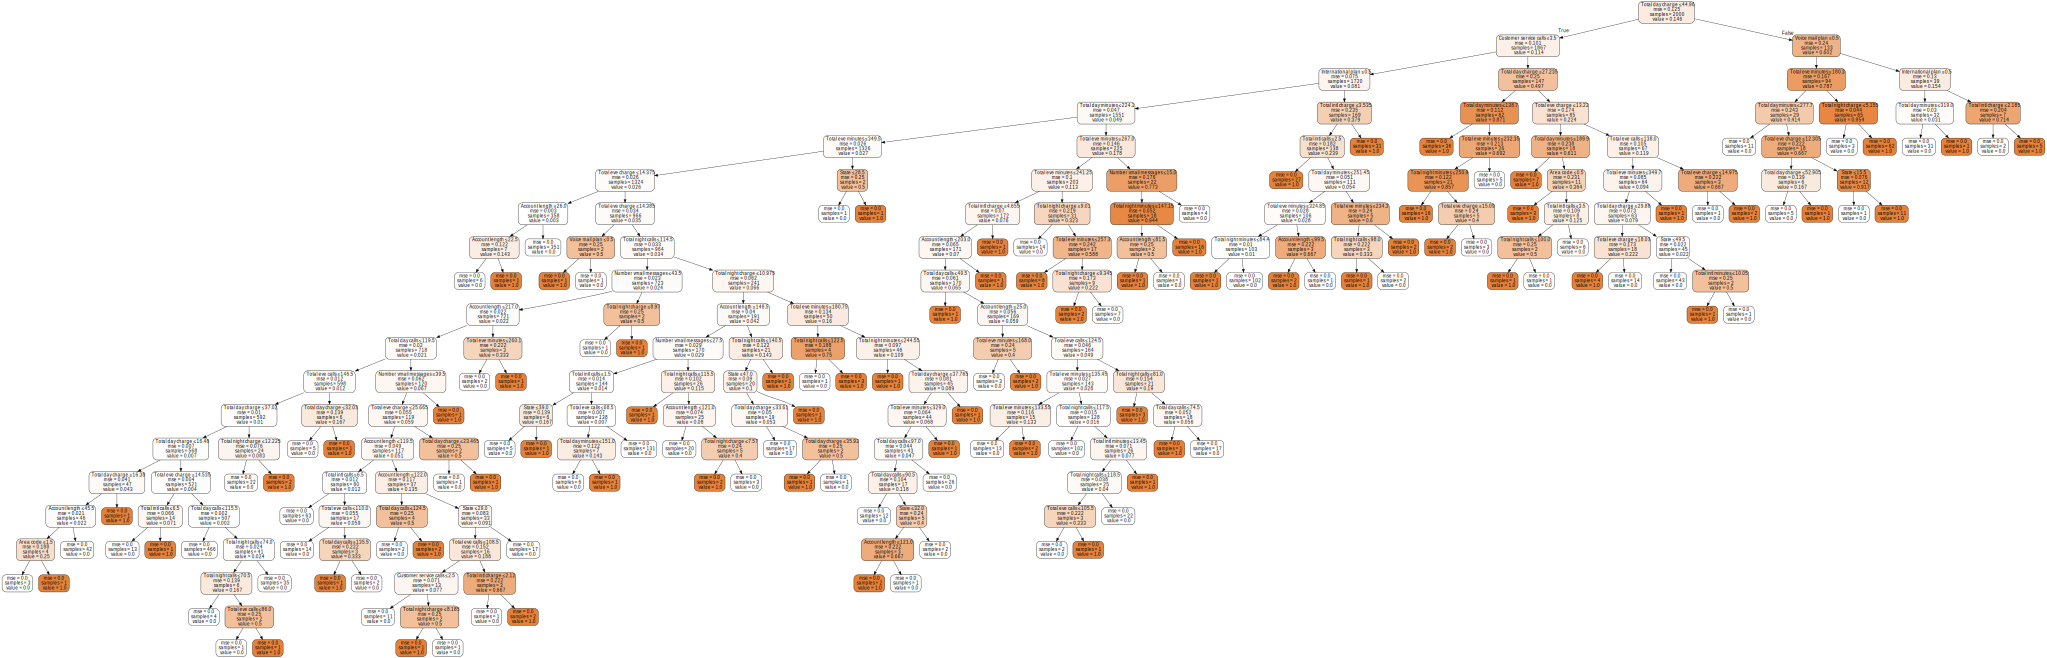

In [12]:
graphviz = tree.export_graphviz(dt)
from IPython.display import SVG
from graphviz import Source
graph = Source(tree.export_graphviz(dt, feature_names=x_train.columns, rounded=True, filled=True, special_characters=True))
graph.render('DecisionTree', view=True)
SVG(graph.pipe(format='svg'))

# DetectOutlierByLOF

In [13]:
from sklearn.neighbors import LocalOutlierFactor
def DetectOutlierByLOF(dataframe):
    lof = LocalOutlierFactor(contamination='auto')
    y_pred = lof.fit_predict(dataframe)
    return y_pred

# DetectOutlierByIQR

In [14]:
def DetectOutlierByIQR(dataframe):
    Q1 = dataframe.quantile(0.25)
    Q3 = dataframe.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - (1.5 * IQR) 
    upper_bound = Q3 + (1.5 * IQR) 
    iqrDf = (dataframe >= lower_bound) & (dataframe <= upper_bound)
    return iqrDf.loc[iqrDf[iqrDf.columns[0]] == False]

# Add LOF to Outlier index list

In [15]:
idxOutlier = set()
checkListLOF = [['Total day minutes', 'Total day calls', 'Total day charge'],
                 ['Total eve minutes', 'Total eve calls', 'Total eve charge']]
checkListIQR = [['Account length'],
                ['Number vmail messages'],
                ['Customer service calls']]
for lofList in checkListLOF:
    checkOutlierAtt = dataEncoded[lofList]
    acceptedList = DetectOutlierByLOF(checkOutlierAtt)
    for i, value in enumerate(acceptedList):
        if (value != 1):
            idxOutlier.add(i)
# display(idxOutlier)

# Add IQR to Outlier index list

In [16]:
for iqrList in checkListIQR:
    checkOutlierAtt = dataEncoded[iqrList]
    resultList = DetectOutlierByIQR(checkOutlierAtt)
    for i, row in resultList.iterrows():
         idxOutlier.add(i)

# Get outlier dataset

In [17]:
outlinerData = dataEncoded.loc[dataEncoded.index.isin(idxOutlier)]
display(outlinerData)

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
10,15,65,1,0,0,0,129.1,137,21.95,228.5,83,19.42,208.8,111,9.40,12.7,6,3.43,4,True
14,12,62,1,0,0,0,120.7,70,20.52,307.2,76,26.11,203.0,99,9.14,13.1,6,3.54,4,False
15,34,161,1,0,0,0,332.9,67,56.59,317.8,97,27.01,160.6,128,7.23,5.4,9,1.46,4,True
21,5,77,0,0,0,0,62.4,89,10.61,169.9,121,14.44,209.6,64,9.43,5.7,6,1.54,5,True
32,18,172,0,0,0,0,212.0,121,36.04,31.2,115,2.65,293.3,78,13.20,12.6,10,3.40,3,False
48,13,119,1,0,0,0,159.1,114,27.05,231.3,117,19.66,143.2,91,6.44,8.8,3,2.38,5,True
54,50,87,1,0,0,0,151.0,83,25.67,219.7,116,18.67,203.9,127,9.18,9.7,3,2.62,5,True
58,48,68,1,0,0,0,148.8,70,25.30,246.5,164,20.95,129.8,103,5.84,12.1,3,3.27,3,False
69,43,150,2,0,0,0,178.9,101,30.41,169.1,110,14.37,148.6,100,6.69,13.8,3,3.73,4,True
77,34,144,0,0,0,0,61.6,117,10.47,77.1,85,6.55,173.0,99,7.79,8.2,7,2.21,4,True


# Get mined data

In [18]:
minedData = dataEncoded.loc[~dataEncoded.index.isin(idxOutlier)]
display(minedData)

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,16,128,1,0,1,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,35,107,1,0,1,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,31,137,1,0,0,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,35,84,0,1,0,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,36,75,1,1,0,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False
5,1,118,2,1,0,0,223.4,98,37.98,220.6,101,18.75,203.9,118,9.18,6.3,6,1.70,0,False
6,19,121,2,0,1,24,218.2,88,37.09,348.5,108,29.62,212.6,118,9.57,7.5,7,2.03,3,False
7,24,147,1,1,0,0,157.0,79,26.69,103.1,94,8.76,211.8,96,9.53,7.1,6,1.92,0,False
8,18,117,0,0,0,0,184.5,97,31.37,351.6,80,29.89,215.8,90,9.71,8.7,4,2.35,1,False
9,49,141,1,1,1,37,258.6,84,43.96,222.0,111,18.87,326.4,97,14.69,11.2,5,3.02,0,False


# Split data for training

In [19]:
x_train_mined, y_train_mined, x_test_mined, y_test_mined = splitDataFrameToTrainAndTest(dataframe=minedData, trainDataRate=0.6, targetAtt='Churn')

# Train and test mined data with Naive Bayes

In [20]:
a = datetime.datetime.now()
NBModelMined = NaiveBayesLearning(x_train_mined, y_train_mined)
b = datetime.datetime.now()
NBMinedTime = b-a
NBMinedAccuracy, NBMinedPredict = NaiveBayesTesting(NBModelMined, x_test_mined, y_test_mined)
print("NB mined data accuracy:", NBMinedAccuracy)

NB mined data accuracy: 0.8959731543624161


# Train and test mined data with Decision Tree

In [21]:
a = datetime.datetime.now()
DTModelMined = DecisionTreeLearning(x_train_mined, y_train_mined)
b = datetime.datetime.now()
DTMinedTime = b-a
DTMinedAccuracy, DTMinedPredict = DecisionTreeTesting(DTModelMined, x_test_mined, y_test_mined)
print("Decision Tree mined data accuracy:", DTMinedAccuracy)

Decision Tree mined data accuracy: 0.9236577181208053


# Graphviz for mined Decision Tree

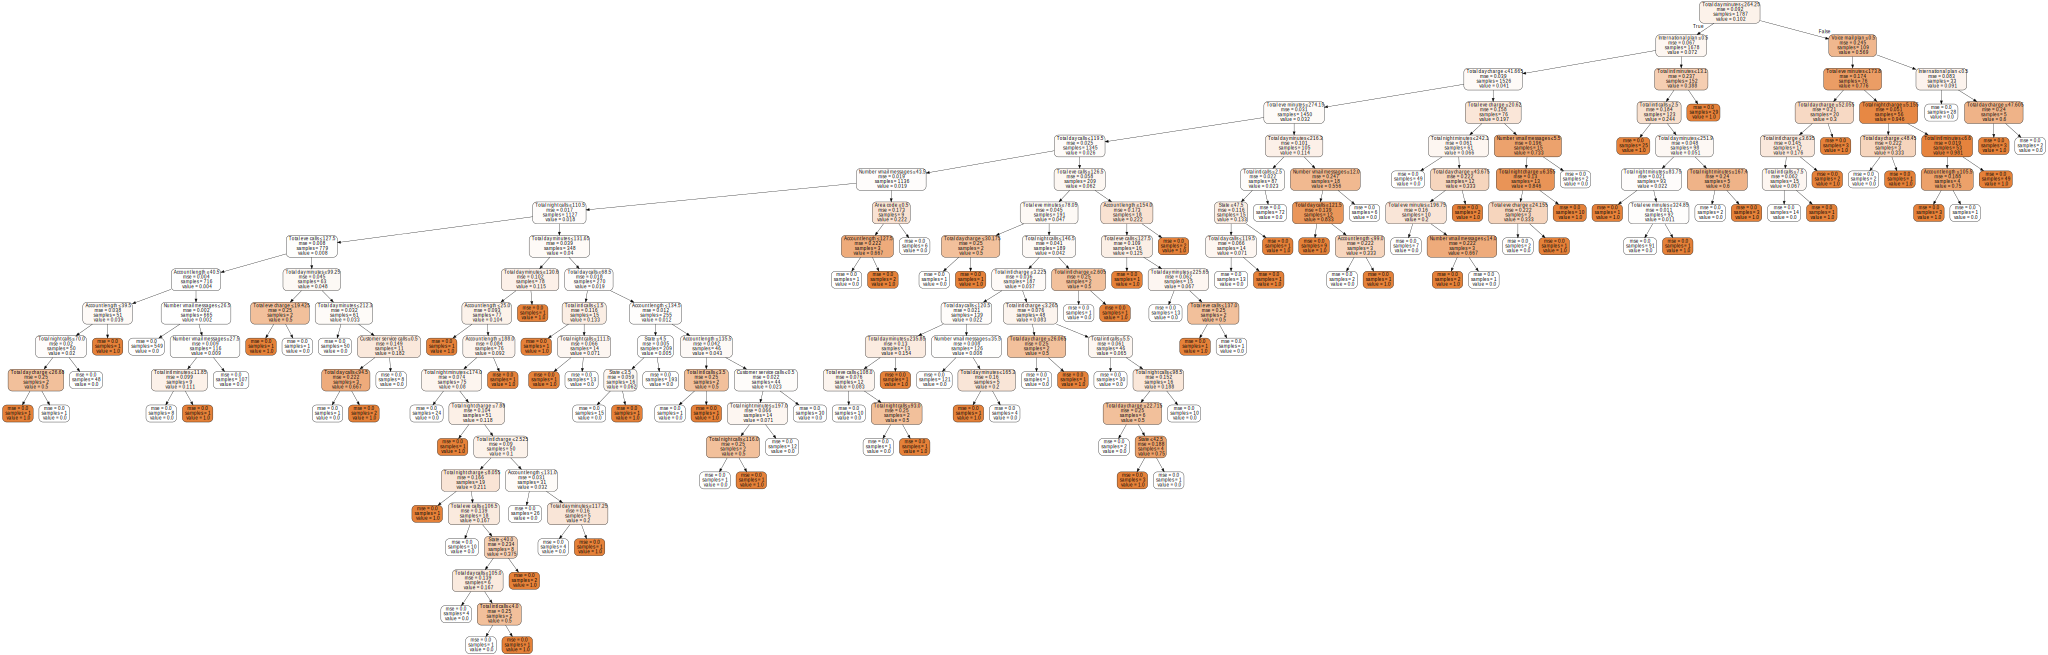

In [22]:
graph = Source(tree.export_graphviz(DTModelMined, feature_names=x_train_mined.columns, rounded=True, filled=True, special_characters=True))
graph.render('DecisionTreeMined', view=True)
SVG(graph.pipe(format='svg'))

In [23]:
print("Naive Bayes time:", NBTime)
print("Naive Bayes Mined Data time:", NBMinedTime)
print("Decision Tree time:", DTTime)
print("Decision Tree Data time:", DTMinedTime)

Naive Bayes time: 0:00:00.003990
Naive Bayes Mined Data time: 0:00:00.001995
Decision Tree time: 0:00:00.024938
Decision Tree Data time: 0:00:00.013952
